In [1]:
from plyfile import PlyData, PlyElement
from hfof import fof, example_data
import numpy as np


In [2]:
# Read in the plyfile

fname = '2017-02-21_20-06-33_9pct_shaded.ply'
plydata = PlyData.read(fname)

In [3]:
# Extract x, y, z coordinates from the plyfile

xarr = plydata.elements[0].data['x']
yarr = plydata.elements[0].data['y']
zarr = plydata.elements[0].data['z']


In [4]:
zarr.max()

20.034475

In [5]:
len(zarr.tolist())


1813627

In [6]:
# Get a single numpy array with the coordinates
coords_all = np.column_stack((xarr, yarr, zarr))


In [36]:
# Set parameters and run hfof
r_cut = 0.006 # linking length

#coords_all[:,2] *= 0.0 # project (squash) z-dimension

fof_labels = fof(coords_all, r_cut, boxsize=1.0)

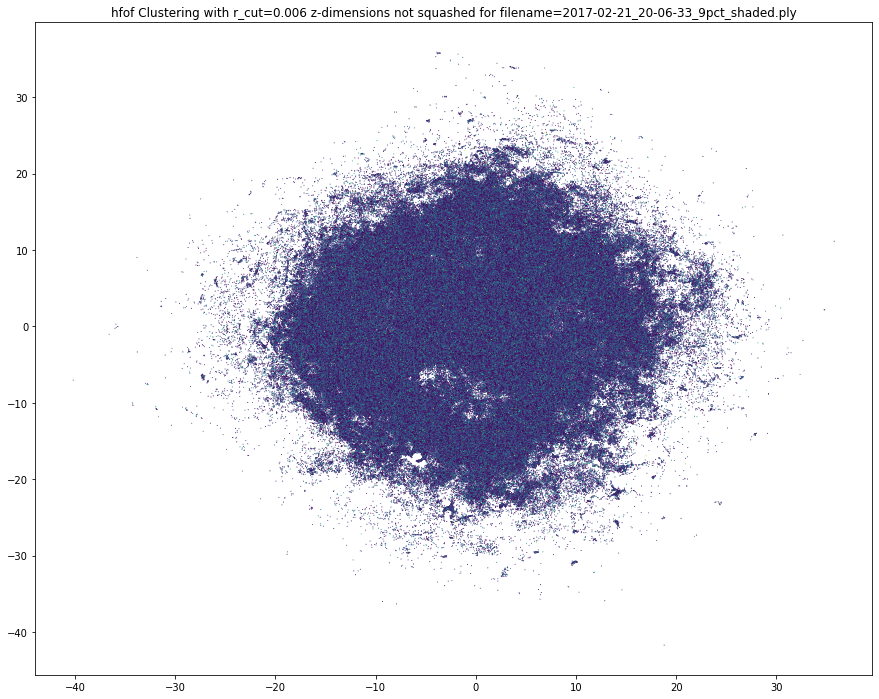

In [37]:
# color by number of particles in group
clrs = np.bincount(fof_labels)[fof_labels]

import matplotlib.pylab as pl

pl.figure(figsize=(15, 12))
pl.scatter(coords_all[:,0],coords_all[:,1], c=np.power(clrs,0.3), s=1.0, edgecolors='none')
pl.title('hfof Clustering with r_cut='+str(r_cut)+' z-dimensions not squashed for filename='+fname)
pl.savefig('Fig7.png', dpi=500)



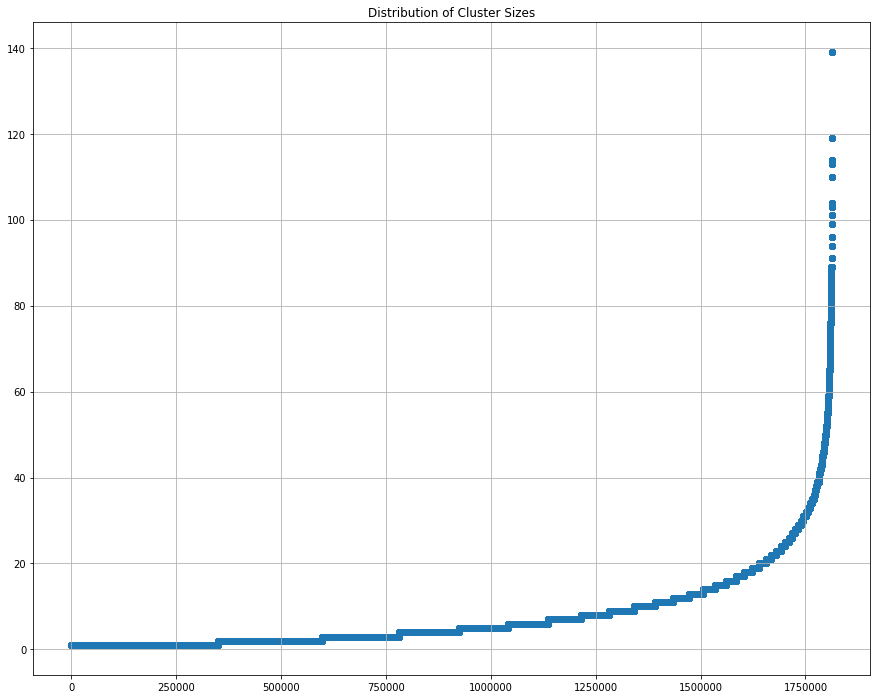

In [40]:
# PLotting the group sizes after clustering

pl.figure(figsize=(15, 12))
pl.title('Distribution of Cluster Sizes')
pl.grid()
pl.scatter(range(0, len(clrs)), sorted(clrs))